In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
# Load the dataset
df = pd.read_csv('Fraud_check.csv')

In [3]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
df.loc[df['Taxable.Income'] <=30000,'Taxable_Income']= 'Risky'
df.loc[df['Taxable.Income'] >30000,'Taxable_Income']= 'Good'

In [5]:
import warnings
warnings.filterwarnings('ignore')
df.drop('Taxable.Income',1,inplace=True)

In [6]:
df['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [7]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df['Marital.Status']= label_encoder.fit_transform(df['Marital.Status']) 
df['Marital.Status'].unique()

array([2, 0, 1])

In [8]:
df.Undergrad.value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

In [9]:
df['Undergrad']= label_encoder.fit_transform(df['Undergrad']) 
df['Undergrad'].unique() 

array([0, 1])

In [10]:
df.Urban.value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

In [11]:
df['Urban']= label_encoder.fit_transform(df['Urban']) 
df['Urban'].unique() 

array([1, 0])

In [12]:
colnames = list(df.columns)
predictors = colnames[0:5]
target = colnames[5]

In [13]:
predictors

['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience', 'Urban']

In [14]:
target

'Taxable_Income'

In [15]:
X = df[predictors]
Y = df[target]

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=2,oob_score=True,n_estimators=1000,criterion="entropy")
rf.fit(X,Y)

RandomForestClassifier(criterion='entropy', n_estimators=1000, n_jobs=2,
                       oob_score=True)

In [17]:
df['rf_pred'] = rf.predict(X)

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df['Taxable_Income'],df['rf_pred'])

array([[476,   0],
       [  0, 124]], dtype=int64)

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
# Splitting data into training and testing data set
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2,random_state=40)
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [21]:
from sklearn import tree

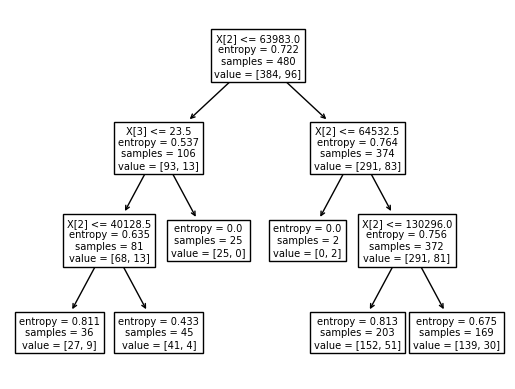

In [22]:
#PLot the decision tree
tree.plot_tree(model);

In [23]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category


Good    120
dtype: int64

In [24]:
preds

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
      

In [25]:
# Accuracy 
np.mean(preds==y_test)

0.7666666666666667

In [26]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [27]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [28]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.7666666666666667

In [29]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold =KFold(n_splits=10,shuffle =True,random_state =None)
model1 =RandomForestClassifier(n_estimators=100,max_features =3)
results=cross_val_score(model1,X,Y, cv =kfold)

In [30]:
print(results)

[0.6        0.71666667 0.8        0.76666667 0.7        0.71666667
 0.83333333 0.8        0.76666667 0.76666667]


In [31]:
print(np.mean(results))

0.7466666666666667


In [35]:
from sklearn.ensemble import BaggingClassifier

In [33]:
kfold1 =KFold(n_splits =10,shuffle =True,random_state=10)
model2=RandomForestClassifier(n_estimators =100,criterion ='entropy',max_features =3)
model3 =BaggingClassifier(base_estimator =model2,n_estimators =100,random_state =10)
results1 =cross_val_score(model3,X,Y,cv=kfold1)

In [34]:
print(results1)

[0.78333333 0.71666667 0.71666667 0.81666667 0.81666667 0.75
 0.75       0.73333333 0.8        0.85      ]
